# Text classification using MultinomialNaiveBayes

In [26]:
import numpy as np
import pandas as pd
import re
import string
import nltk
import emoji
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [27]:
df_train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
df_test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [28]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [29]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [30]:
print("Shape of train data: ", df_train.shape)
print("Shape of test data: ", df_test.shape)

Shape of train data:  (7613, 5)
Shape of test data:  (3263, 4)


In [31]:
print("Sum of null values in each column in train data:\n", df_train.isnull().sum())
print("__________________________")
print()
print("Sum of null values in each column in test data:\n", df_test.isnull().sum())

Sum of null values in each column in train data:
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
__________________________

Sum of null values in each column in test data:
 id             0
keyword       26
location    1105
text           0
dtype: int64


In [32]:
print(df_train.columns)
print(df_test.columns)

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
Index(['id', 'keyword', 'location', 'text'], dtype='object')


In [33]:
# Function converting to lowercase, Removing html tags, urls, punctuation, stopwords, emojis

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

def remove_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')

def text_preprocessing(text):
    text = text.lower()
    text = remove_stopwords(text)
    text = remove_punctuations(text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = remove_emojis(text)
    return text


In [34]:
# Applying the function for columns in the dataset

df_train['text'] = df_train['text'].apply(text_preprocessing)
df_test['text'] = df_test['text'].apply(text_preprocessing)

df_train['keyword'] = df_train['keyword'].fillna('Unknown')
df_test['keyword'] = df_test['keyword'].fillna('Unknown')

df_train['keyword'] = df_train['keyword'].apply(text_preprocessing)
df_test['keyword'] = df_test['keyword'].apply(text_preprocessing)

df_train['location'] = df_train['location'].fillna('Unknown')
df_test['location'] = df_test['location'].fillna('Unknown')

df_train['location'] = df_train['location'].apply(text_preprocessing)
df_test['location'] = df_test['location'].apply(text_preprocessing)


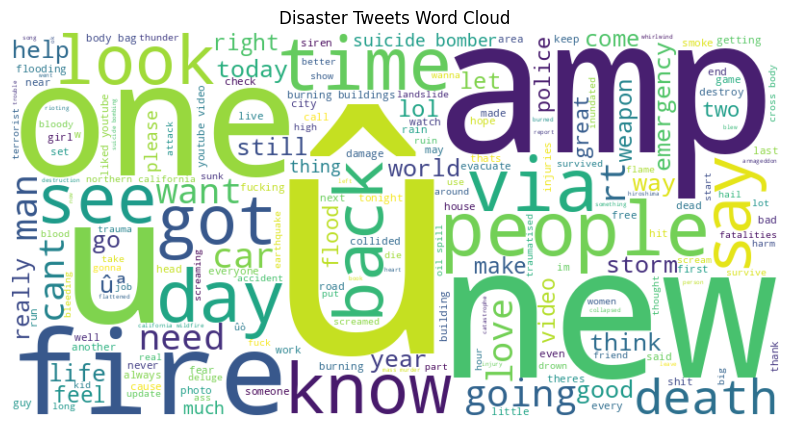

In [35]:
all_text = ' '.join(df_train['text'].astype(str))
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Disaster Tweets Word Cloud")
plt.show()

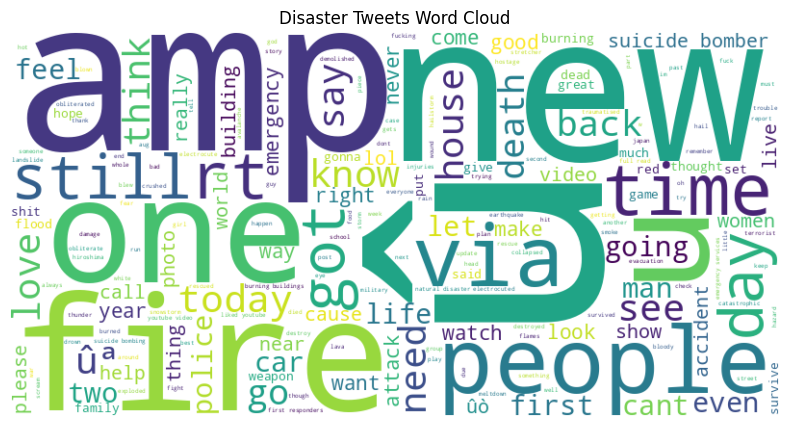

In [36]:
all_text = ' '.join(df_test['text'].astype(str))
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Disaster Tweets Word Cloud")
plt.show()

In [37]:
data = df_train.drop(['id', 'target'], axis = 1)
y = df_train['target']

In [38]:
data['combined_text'] = data['text'] + ' ' + data['keyword'] + ' ' + data['location']

In [39]:
vectorizer = CountVectorizer(max_features = 5000)
X = vectorizer.fit_transform(data['combined_text'])

In [40]:
mnb = MultinomialNB()
mnb.fit(X, y)
mnb.score(X, y)

0.8536713516353606

In [41]:
y_pred = mnb.predict(X)
mnb.score(X, y_pred)

1.0

In [42]:
data1 = df_test.drop(['id'], axis = 1)
data1['combined_text'] = data1['text'] + ' ' + data1['keyword'] + ' ' + data1['location']

In [43]:
X1 = vectorizer.fit_transform(data1['combined_text'])

In [44]:
y_pred1 = mnb.predict(X1)
mnb.score(X1, y_pred1)

1.0

In [45]:
sub = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')
sub

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [46]:
# comparing the submission target and predicted target
sub['predicted'] = y_pred1
print(sub.head())

   id  target  predicted
0   0       0          0
1   2       0          1
2   3       0          1
3   9       0          1
4  11       0          1


In [47]:
sub[sub['predicted'] == sub['target']]

,id,target,predicted
0,0,0,0
5,12,0,0
7,22,0,0
9,29,0,0
12,42,0,0
...,...,...,...
3253,10838,0,0
3254,10845,0,0
3257,10858,0,0
3259,10865,0,0


In [49]:
# sub_df = pd.DataFrame(y_pred1, columns=['Predicted']) 
# sub_df.to_csv('submission.csv', index = False)